In [47]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [48]:
height, width = 200, 200

In [49]:
img = Image.open('../assets/cat.webp').resize((height, width)).convert('L')
arr = np.array(img)

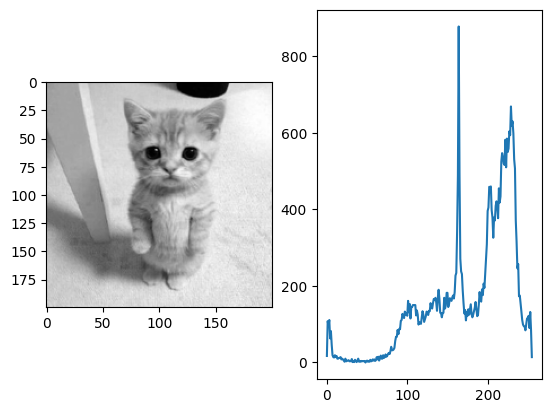

In [50]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

In [51]:
# creating normalized cumulative histogram

cum_hist = img.histogram()
total = 0
for i in range(len(cum_hist)):
    total += cum_hist[i]
    cum_hist[i] = total / (height * width)

Text(0.5, 1.0, 'Cumulative histogram')

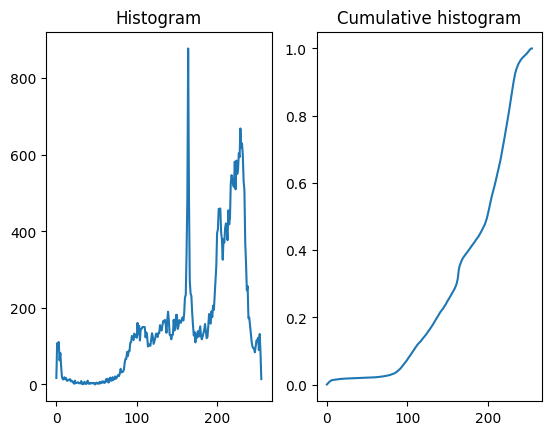

In [52]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(img.histogram())
axes[0].set_title('Histogram')
axes[1].plot(cum_hist)
axes[1].set_title('Cumulative histogram')

In [53]:
better_arr = arr.copy()
for i in range(height):
    for j in range(width):
        # transformation function
        # s = round(255 * cum_hist[r])
        better_arr[i, j] = round(cum_hist[better_arr[i, j]] * 255)

In [54]:
betterimg = Image.fromarray(better_arr, 'L')

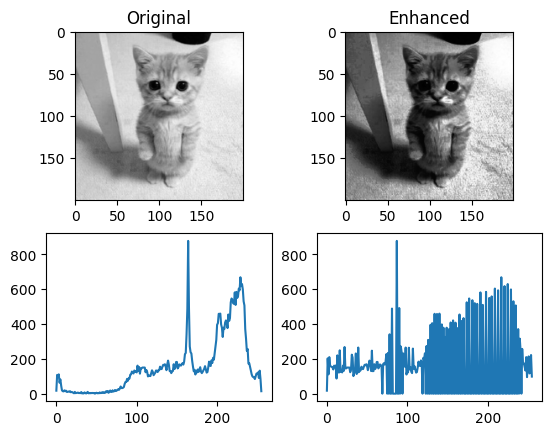

In [55]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].set_title('Original')
axes[0, 0].imshow(img, 'gray')
axes[1, 0].plot(img.histogram())
axes[0, 1].set_title('Enhanced')
axes[0, 1].imshow(betterimg, 'gray')
axes[1, 1].plot(betterimg.histogram())